# Next Word Prediction:

### Importing The Required Libraries:

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
"""
    Dataset: http://www.gutenberg.org/cache/epub/5200/pg5200.txt
    Remove all the unnecessary data and label it as Metamorphosis-clean.
    The starting and ending lines should be as follows.

"""


file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


### Cleaning the data:

In [3]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [4]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [5]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

### Tokenization:

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [7]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [8]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [9]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [10]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [11]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [12]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             26170     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


### Plot The Model:

In [14]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Callbacks:

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Compile The Model:

In [17]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

### Fit The Model:

In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 7.8756
Epoch 1: loss improved from inf to 7.87560, saving model to nextword1.h5
61/61 [==============================] - 11s 142ms/step - loss: 7.8756 - lr: 0.0010
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 7.8621
Epoch 2: loss improved from 7.87560 to 7.86214, saving model to nextword1.h5
61/61 [==============================] - 8s 127ms/step - loss: 7.8621 - lr: 0.0010
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 7.8091
Epoch 3: loss improved from 7.86214 to 7.80911, saving model to nextword1.h5
61/61 [==============================] - 8s 124ms/step - loss: 7.8091 - lr: 0.0010
Epoch 4/150
61/61 [==============================] - ETA: 0s - loss: 7.5903
Epoch 4: loss improved from 7.80911 to 7.59032, saving model to nextword1.h5
61/61 [==============================] - 9s 140ms/step - loss: 7.5903 - lr: 0.0010
Epoch 5/150
61/61 [==============================] - ETA: 0

61/61 [==============================] - 11s 176ms/step - loss: 4.1035 - lr: 0.0010
Epoch 36/150
61/61 [==============================] - ETA: 0s - loss: 4.0239
Epoch 36: loss improved from 4.10351 to 4.02386, saving model to nextword1.h5
61/61 [==============================] - 12s 196ms/step - loss: 4.0239 - lr: 0.0010
Epoch 37/150
61/61 [==============================] - ETA: 0s - loss: 3.9477
Epoch 37: loss improved from 4.02386 to 3.94767, saving model to nextword1.h5
61/61 [==============================] - 16s 262ms/step - loss: 3.9477 - lr: 0.0010
Epoch 38/150
61/61 [==============================] - ETA: 0s - loss: 3.8478
Epoch 38: loss improved from 3.94767 to 3.84783, saving model to nextword1.h5
61/61 [==============================] - 11s 176ms/step - loss: 3.8478 - lr: 0.0010
Epoch 39/150
61/61 [==============================] - ETA: 0s - loss: 3.7758
Epoch 39: loss improved from 3.84783 to 3.77579, saving model to nextword1.h5
61/61 [==============================] - 8s 

61/61 [==============================] - ETA: 0s - loss: 1.9977
Epoch 70: loss did not improve from 1.99290
61/61 [==============================] - 8s 130ms/step - loss: 1.9977 - lr: 0.0010
Epoch 71/150
61/61 [==============================] - ETA: 0s - loss: 1.9831
Epoch 71: loss improved from 1.99290 to 1.98306, saving model to nextword1.h5
61/61 [==============================] - 8s 136ms/step - loss: 1.9831 - lr: 0.0010
Epoch 72/150
61/61 [==============================] - ETA: 0s - loss: 1.9538
Epoch 72: loss improved from 1.98306 to 1.95382, saving model to nextword1.h5
61/61 [==============================] - 8s 137ms/step - loss: 1.9538 - lr: 0.0010
Epoch 73/150
61/61 [==============================] - ETA: 0s - loss: 1.9285
Epoch 73: loss improved from 1.95382 to 1.92852, saving model to nextword1.h5
61/61 [==============================] - 8s 128ms/step - loss: 1.9285 - lr: 0.0010
Epoch 74/150
61/61 [==============================] - ETA: 0s - loss: 1.9043
Epoch 74: loss imp

### Graph:

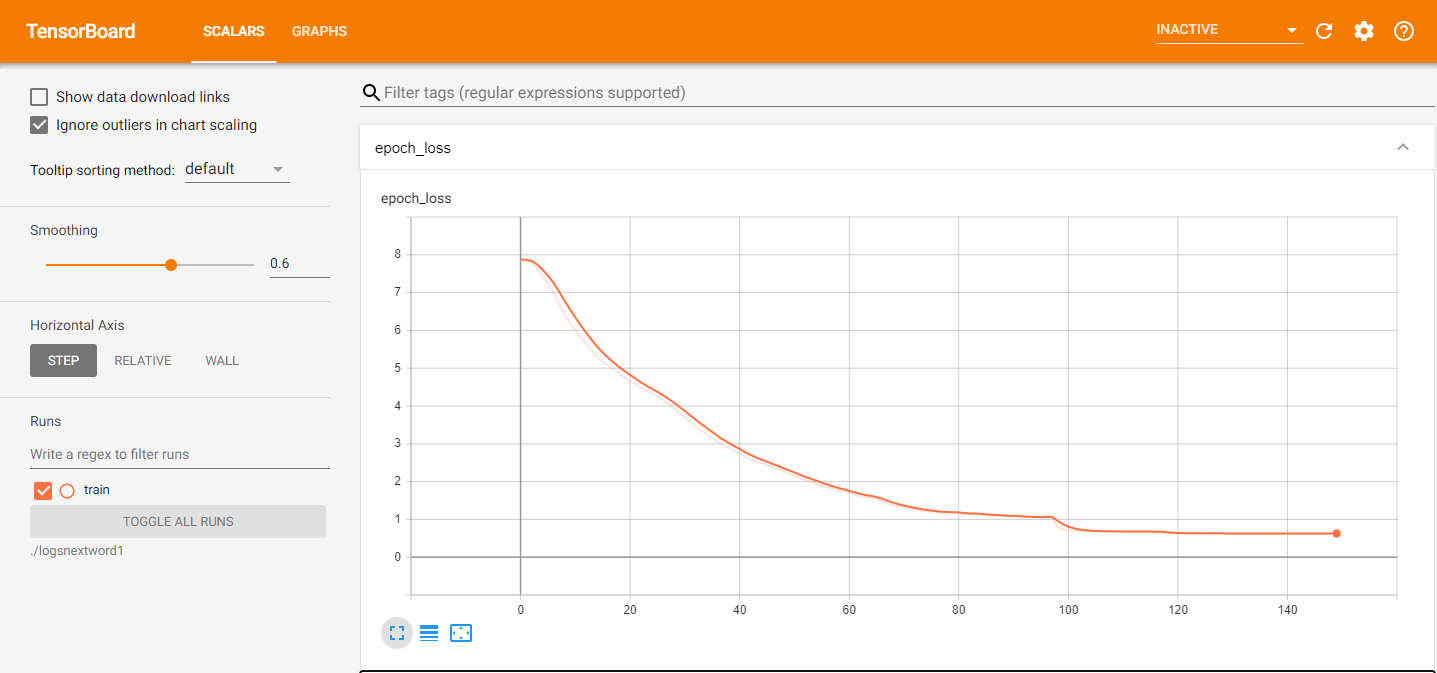

In [19]:
# https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook
# tensorboard --logdir="./logsnextword1"
# http://DESKTOP-U3TSCVT:6006/

from IPython.display import Image 
pil_img = Image(filename='graph1.png')
display(pil_img)

## Observation:
### We are able to develop a decent next word prediction model and are able to get a declining loss and an overall decent performance.